In [1]:
# Импорт библиотек
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from fastai.vision.all import *  # Импортируем все необходимые модули для работы с изображениями в fastai

In [3]:
#Тестирование обученной модели на примере конкретного изображения
def test_model(model, image):
    image.show(title="Исходное изображение", figsize=(4,4))
    pred, _, _ = model.predict(image)  # Делаем предсказание маски для изображения
    pred.show(title = "Предсказанная маска", figsize=(4,4))  # Отображаем предсказанную маску

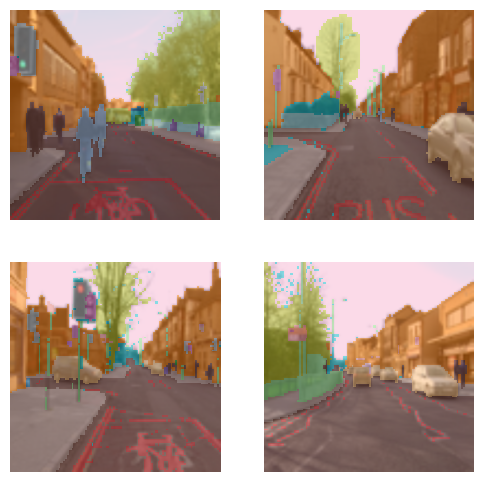

In [5]:
# Загружаем готовый размеченный датасет CamVid_Tiny
path = untar_data(URLs.CAMVID_TINY)  # Автоматически скачиваем и разархивируем небольшой датасет CamVid

# Загружаем список классов (объектов для сегментации)
codes = np.loadtxt(path/'codes.txt', dtype=str)

dblock = DataBlock(
    blocks=(ImageBlock, MaskBlock(codes=codes)),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda o: path/'labels'/(o.stem + '_P.png'),
    item_tfms=[Resize(256)],
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
)

# Создаем DataLoaders для загрузки данных в модель
dls = dblock.dataloaders(path/'images', bs=4)

dls.show_batch(max_n=4, figsize=(6,6))

In [7]:
learn_34 = unet_learner(dls, resnet34, metrics=[DiceMulti, JaccardCoeff])
learn_34.fine_tune(5)

epoch,train_loss,valid_loss,dice_multi,jaccard_coeff,time
0,2.462529,2.190105,0.049231,-1.211637,00:02


epoch,train_loss,valid_loss,dice_multi,jaccard_coeff,time
0,1.571445,1.227195,0.111258,-1.137912,00:02
1,1.330551,0.962943,0.158572,-1.129361,00:02
2,1.126490,0.796165,0.205875,-1.123890,00:02
3,0.975513,0.714281,0.207585,-1.117685,00:02
4,0.871397,0.704945,0.213473,-1.120771,00:02


Результаты обученной модели (ResNET 34)


C:\Users\prayD\anaconda3\Lib\site-packages\fastai\metrics.py:375: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


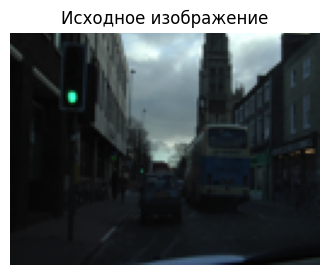

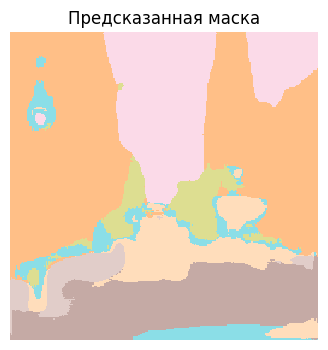

In [9]:
# Тестируем стартовую модель модель на новом изображении
img = PILImage.create(get_image_files(path/'images')[0])  # Загружаем одно из тестовых изображений

print("Результаты обученной модели (ResNET 34)")
test_model(learn_34, img)

In [11]:
learn_50 = unet_learner(dls, resnet50, metrics=[DiceMulti, JaccardCoeff])
learn_50.fine_tune(5)

epoch,train_loss,valid_loss,dice_multi,jaccard_coeff,time
0,2.456946,1.987142,0.072751,-1.125204,00:11


epoch,train_loss,valid_loss,dice_multi,jaccard_coeff,time
0,1.410579,1.381701,0.107502,-1.143459,00:11
1,1.776388,1.168118,0.100352,-1.143941,00:11
2,1.580753,1.160232,0.107749,-1.146437,00:11
3,1.354434,0.931252,0.129079,-1.133208,00:11
4,1.190754,0.890570,0.147063,-1.134262,00:11


Результаты обученной модели (ResNET 50)


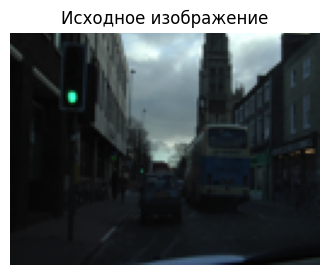

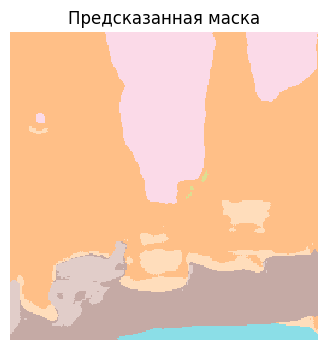

In [13]:
print("Результаты обученной модели (ResNET 50)")
test_model(learn_50, img)

In [15]:
learn_101 = unet_learner(dls, resnet101, metrics=[DiceMulti, JaccardCoeff])
learn_101.fine_tune(5)

epoch,train_loss,valid_loss,dice_multi,jaccard_coeff,time
0,3.228115,2.418718,0.041988,-1.121706,06:21


epoch,train_loss,valid_loss,dice_multi,jaccard_coeff,time
0,1.756450,1.449872,0.090947,-1.160553,03:05
1,1.509030,1.146017,0.102290,-1.149146,03:23
2,1.337824,0.967347,0.125939,-1.144275,03:11
3,1.182482,0.910629,0.173716,-1.143422,03:11
4,1.064226,0.832019,0.176447,-1.141214,03:18


Результаты обученной модели (ResNET 101)


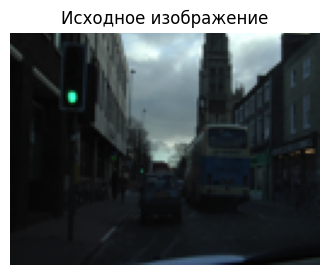

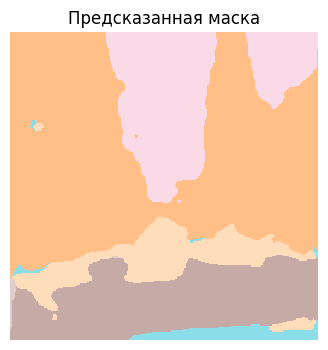

In [17]:
print("Результаты обученной модели (ResNET 101)")
test_model(learn_101, img)

В результате было получено, что при одном и том же кол-ве эпох (5), размере пачки (4), разрешении изображения (256х256), применении метрики IoU применение моделей тяжелее resnet34 не имеет смысла, т.к. требует большего кол-ва ресурсов при этом возвращая маски более низкого "качества"